# Exploratory Data Analysis and Quality Prediction on Red Wine Data

## Business Understanding

For this project, I used Red Wired_wine_quality_data_analysisne Dataset from UCI Machine Learning Repository to get insight based on below questions:
* How different features are correlated with each other? 
* Which features are affecting the quality of red wine?
* Are there any outliers present in the dataset?
* Can we build a classification model to predict quality of red wine? 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import warnings
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
# load data in pandas dataframe
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


First, we'll check the follwing basic information about the data
1. get statistical information of the numerical features
2. check for duplicates  
3. check for missing values
4. analyse the target variable

In [3]:
# get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# get statistical information about numerical columns in the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Check for duplicates
df.duplicated().sum()

240

There are some duplicates present in the dataset. We'll remove these later in this notebook (Data Preparation Section) 

In [6]:
# check for missing values
# check for column names that have some missing values and number of unique values in that column
df.nunique()[df.nunique() != len(df)].sort_values(ascending=False)

density                 436
chlorides               153
total sulfur dioxide    144
volatile acidity        143
sulphates                96
fixed acidity            96
residual sugar           91
pH                       89
citric acid              80
alcohol                  65
free sulfur dioxide      60
quality                   6
dtype: int64

In [7]:
# check for column names that do not have any missing values and all values are unique
df.nunique()[df.nunique()==len(df)]

Series([], dtype: int64)

In [8]:
# check for number of missing values in each column in descending order
df.isnull().sum().sort_values(ascending=False)

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

It seems that there are no missing values in any feature. Now, let's check how data is distributed in target variable 'quality'.

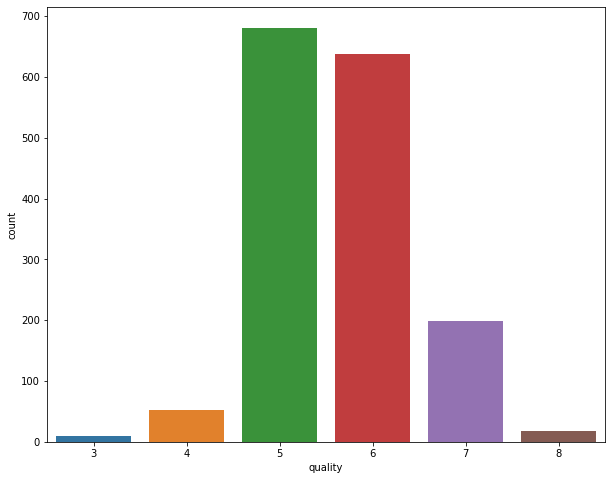

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x ='quality', data = df)
plt.show()

We got wine quality ranging from 3 to 8 and the data it is distributed in an imbalnced manner within the range.  

### Question: 1 How different features are correlated with each other?
Let's find the correlation matrix for all the features. We'll use df.corr() function to get the matrix. 

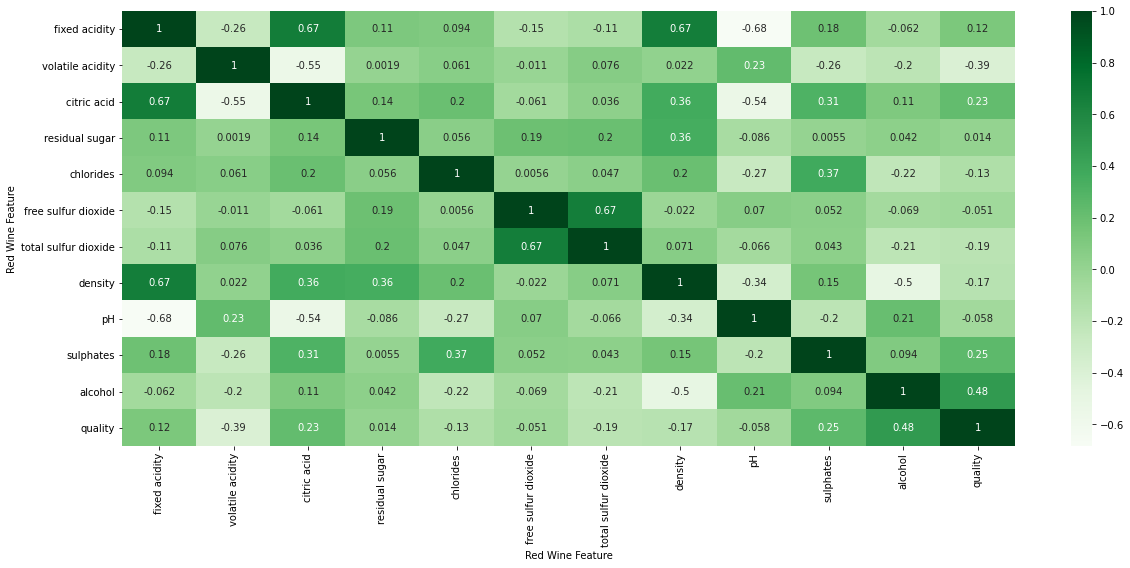

In [10]:
corr = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.xlabel('Red Wine Feature')
plt.ylabel('Red Wine Feature')
plt.show()

Conclusion:
1. Alcohol is positively and highly correlated with the quality of the red wine.
2. Residual Sugar has a weak positive correlation with the pH value.
3. Citric acid and density have a strong positive correlation with fixed acidity.
4. pH has a negative correlation with density, fixed acidity, citric acid, and chlorides. 

### Question 2: Which features are affecting the quality of red wine?

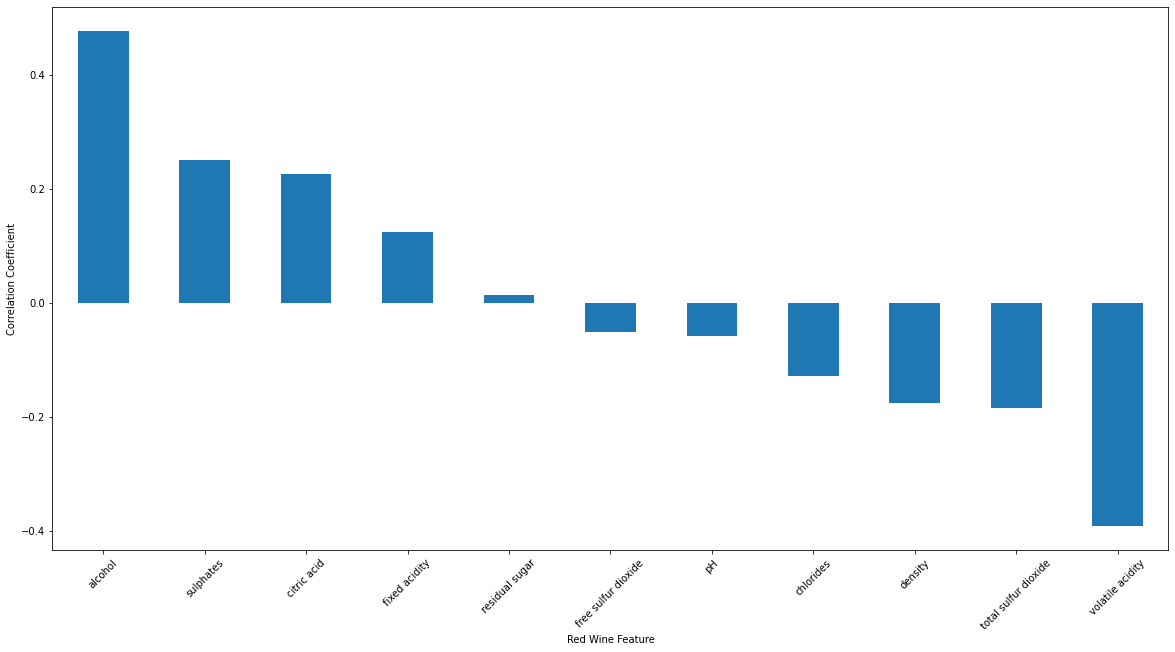

In [11]:
# let's see barplot of correlation of all features with quality to derive some more insight.
plt.figure(figsize=(20,10))
top_correlated_features = df.corr()['quality'].sort_values(ascending = False)[1:]
top_correlated_features.plot(kind = 'bar');
plt.xlabel('Red Wine Feature')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

#### Positive Correlation: 
**A positive correlation is a relationship between two variables in which both variables move in the same direction.**

From above plot we derive that following features are positively correlated with 'quality' of red wine.
1. 'alcohol'
2. 'sulphates'
3. 'citric acid' 
4. 'fixed acidity'
5. 'residual sugar'

#### Negative Correlation: 
**A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other.**

From above plot we derive that following features are negatively correlated with 'quality' of red wine.
1. 'volatile acidity'
2. 'total sulfur dioxide'
3. 'density', 
4. 'chlorides'
5. 'free sulfur dioxide' 
6. 'pH'

To conclude we can say, **'alcohol', 'sulphates', 'volatile acidity' and 'density'** are 4 highly correlated features w.r.t.  'quality' of red wine.

To know how the physico-chemical properties are affecting the quality of red wine, we'll visualize the line plot for all the features with respect to the quality of red wine.

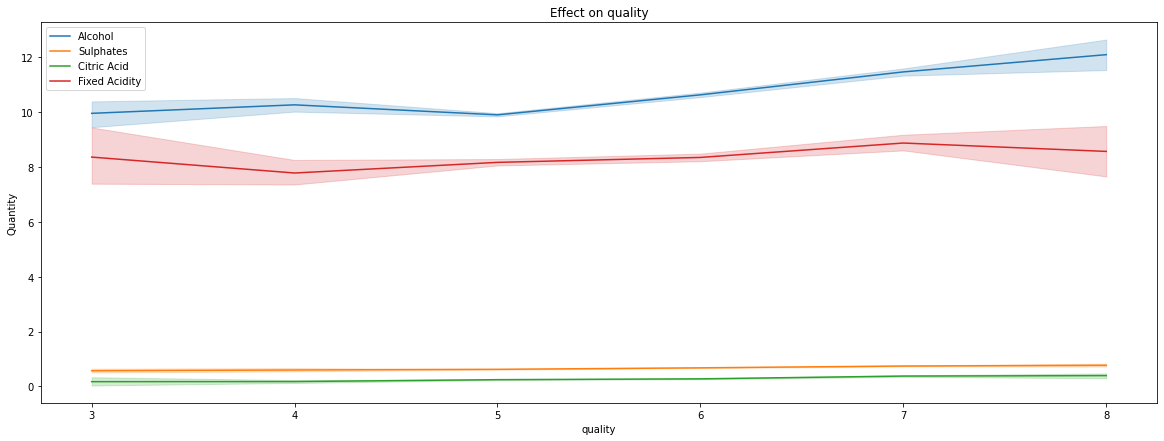

In [12]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="alcohol",label="Alcohol")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="fixed acidity",label="Fixed Acidity")

plt.ylabel("Quantity")
plt.title("Effect on quality")
plt.legend()
plt.show()

#### Conclusion:
We can see that **'alcohol', 'fixed acidity'** are affecting the quality of red wine. 

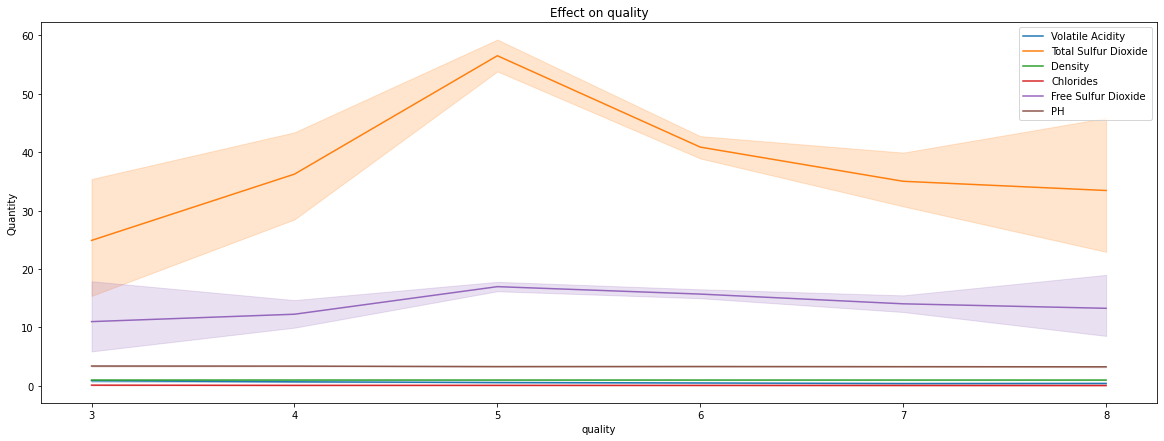

In [13]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",label="Total Sulfur Dioxide")
sns.lineplot(data=df, x="quality",y="density",label="Density")
sns.lineplot(data=df, x="quality",y="chlorides",label="Chlorides")
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",label="Free Sulfur Dioxide")
sns.lineplot(data=df, x="quality",y="pH",label="PH")

plt.ylabel("Quantity")
plt.title("Effect on quality")
plt.legend()
plt.show()

#### Conclusion:
We can see that **'total sulfur dioxide', 'free sulfur dioxide'** are affecting the quality of red wine. 

### Question 3: Are there any outlier present in the dataset?
Boxplots are a standardized way of displaying the distribution of data based on a five number summary ('minimum', first quartile (Q1), median, third quartile (Q3), and 'maximum'). To detect outliers, we can visualize the boxplot for all the features. 

In [14]:
def view_feature_plots(feature):
    """
    Summary:
        utility function to plot distribution and boxplots for each feature in the dataset  
    
    Parameters:
        feature (Series): Pandas Series for given feature
    """
    plt.figure(figsize=(20, 7))
    
    # plot distribution using mean and standard deviation
    plt.subplot(1, 2, 1)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    plt.axvline(mu, linestyle = '-', color = 'green', label ='mean')
    plt.axvline(sigma, linestyle = '-', color = 'red', label = 'standard deviation')
    plt.title(f'{feature.name} distribution plot')

    # plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

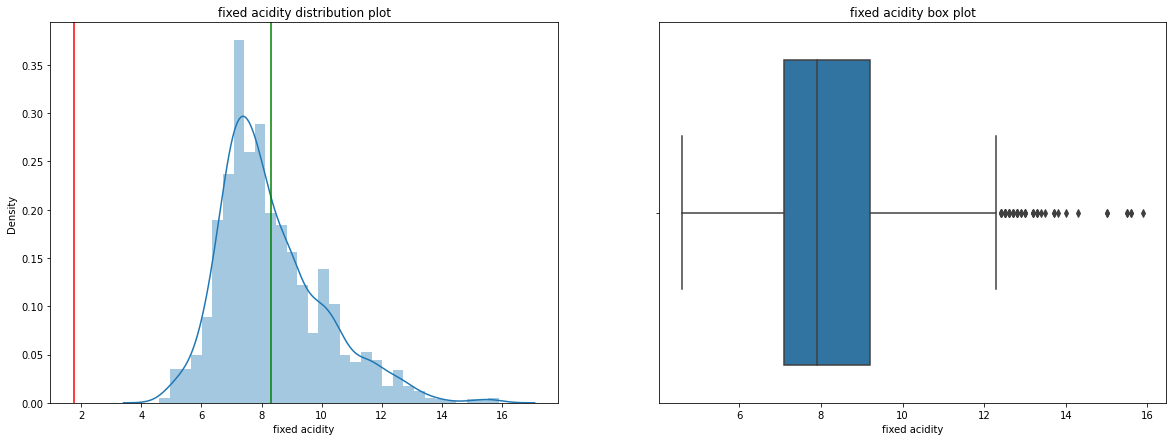

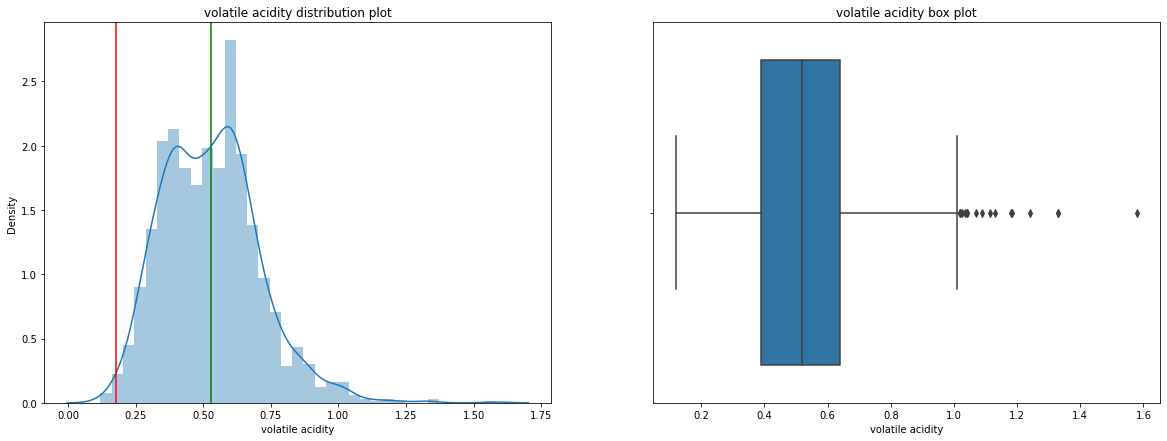

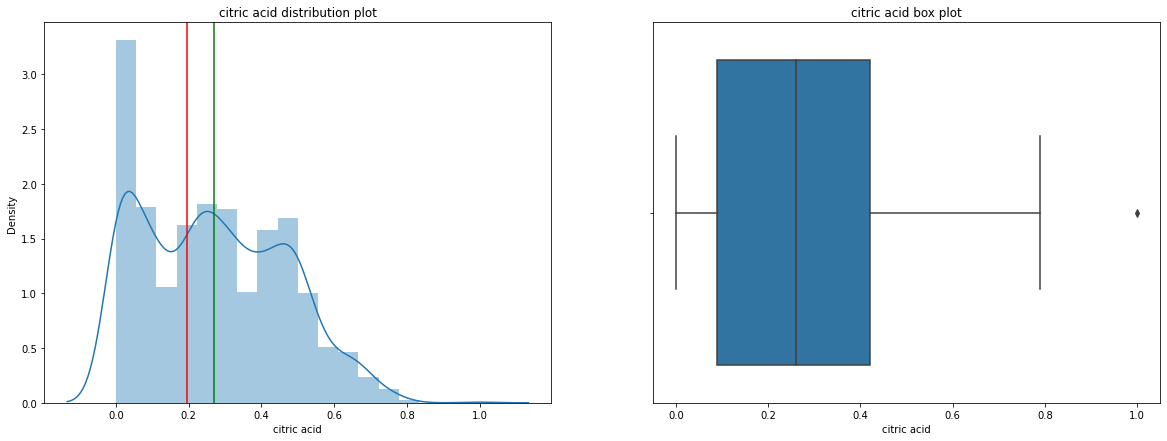

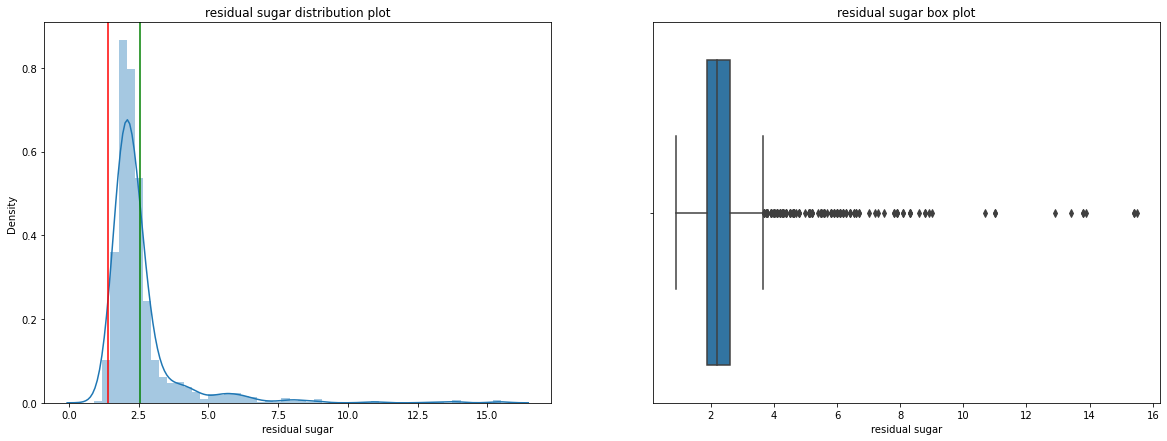

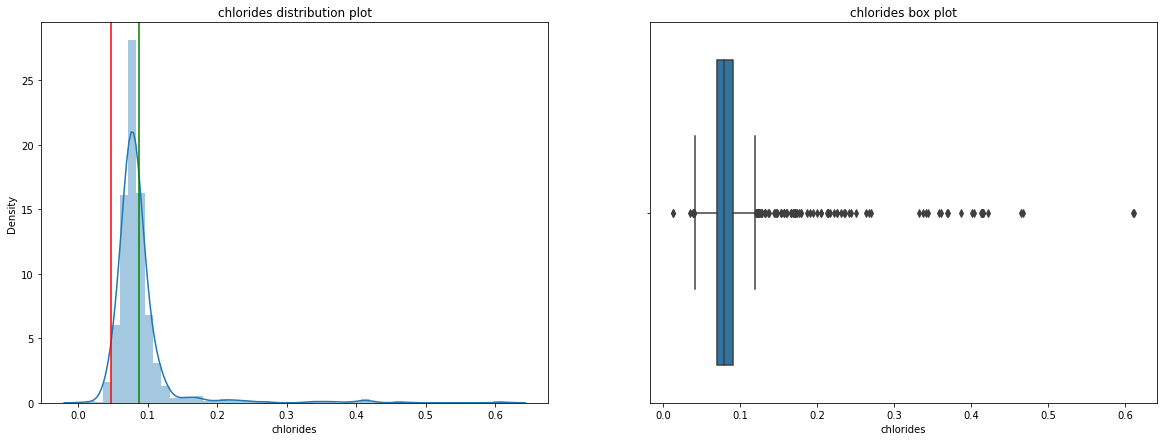

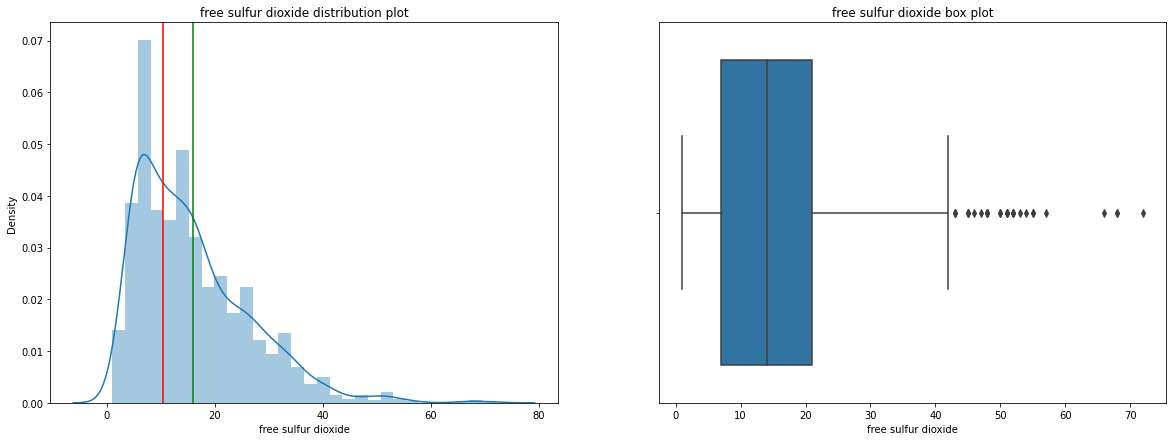

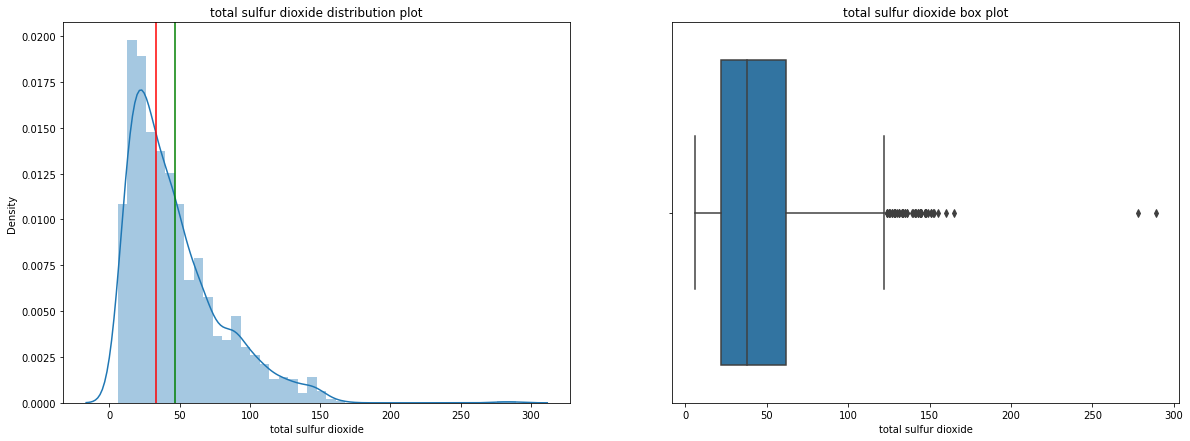

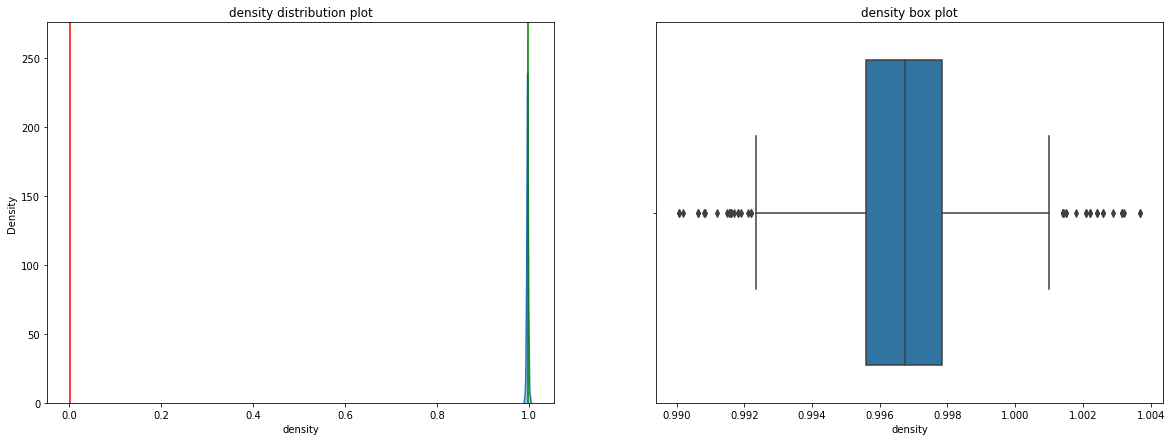

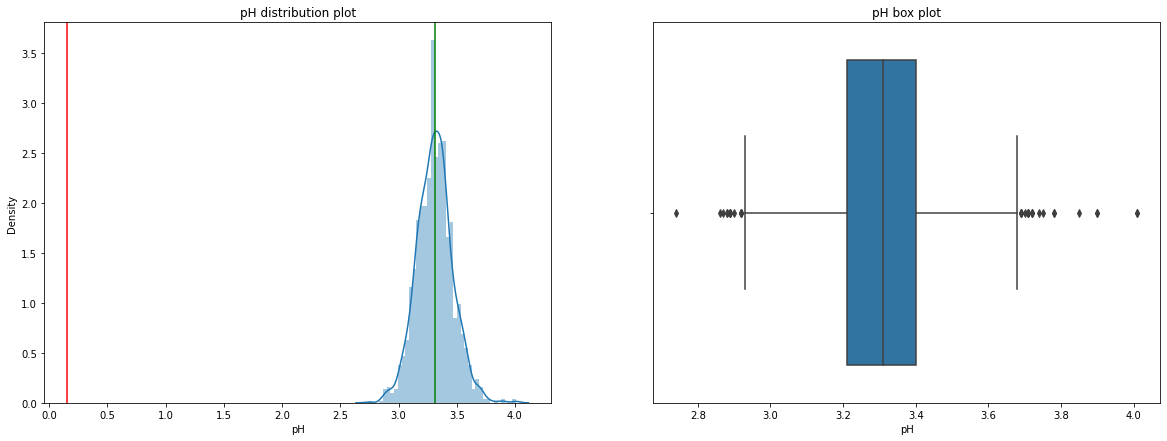

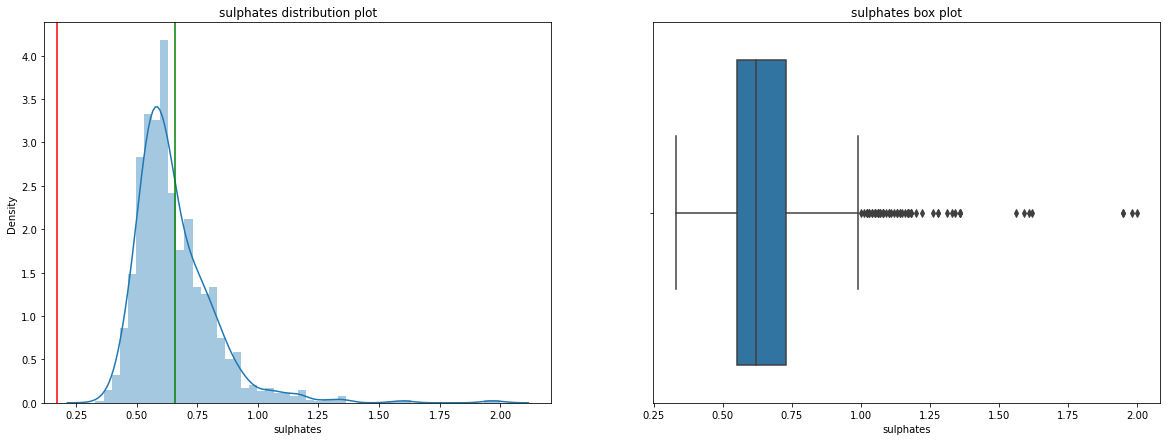

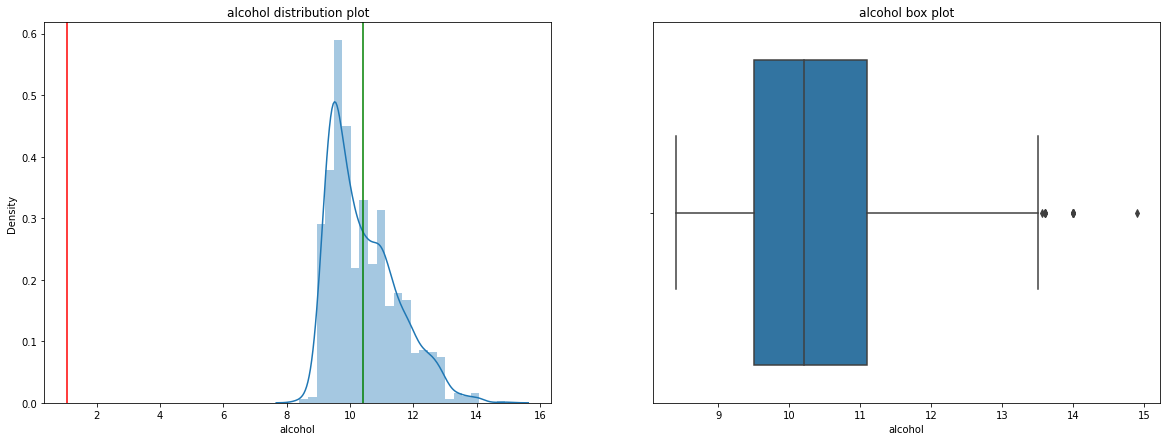

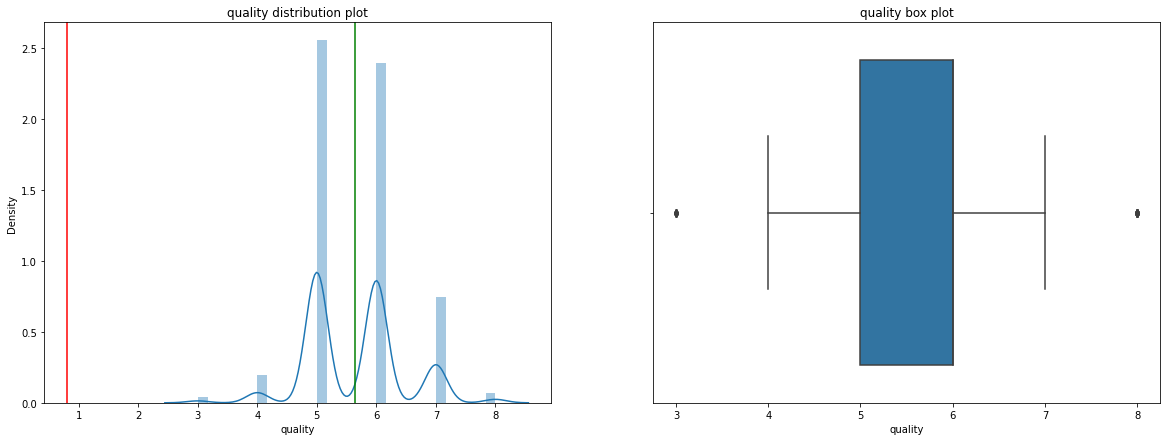

In [15]:
# all the fetaure are of dtype float64, so we can plot graphs for all
for feature in df.columns:
    view_feature_plots(df[feature])

From distribution plots we say that 'pH', 'denisity' are normally distibuted and these follow gaussian distribution. And other have right skewed distribution. Whereas box plots are clearly indicating that there are outliers present in the dataset. 

#### What is an outlier?

**An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.**

#### Impact of outliers:

1. Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
2. Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.

#### How to remove outliers?
   We find data points that fall outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile. 
   
We'll remove the outliers in Data Preparation Section.

## Data Preparation

In [16]:
def remove_outliers(df):
    """
    Summary:
        utility function to remove outliers using Inter-Quartile-Range (IQR) method 
    
    Parameters:
        df (Dataframe): Pandas Series for given feature
    
    Returns:
        df_outlier_removed(Dataframe): Pandas dataframe without outliers
    """
    df_outlier_removed = df.copy()
    for i in [i for i in df_outlier_removed.columns]:
        if df_outlier_removed[i].nunique()>=12:
            Q1 = df_outlier_removed[i].quantile(0.25)
            Q3 = df_outlier_removed[i].quantile(0.75)
            IQR = Q3 - Q1
            df_outlier_removed = df_outlier_removed[df_outlier_removed[i] <= (Q3+(1.5*IQR))]
            df_outlier_removed = df_outlier_removed[df_outlier_removed[i] >= (Q1-(1.5*IQR))]
    df_outlier_removed = df_outlier_removed.reset_index(drop=True)
    return df_outlier_removed

In [17]:
def data_preparation(df):
    """
    Summary:
        utility function to clean the dataset
    Parameters:
        df (Dataframe): Pandas Series for given feature
    
    Returns:
        df : cleaned dataframe
    """
    # remove duplicates
    print(f"Shape of dataset before removing duplicates: {df.shape}")
    df.drop_duplicates(inplace=True, keep='first')
    print(f"Shape of dataset after removing duplicates: {df.shape}")
    
    
    # remove outliers from the dataset
    print(f"Shape of dataset before removing outliers: {df.shape}")
    df = remove_outliers(df)
    print(f"Shape of dataset before removing outliers: {df.shape}")
    return df

In [18]:
df_cleaned = data_preparation(df)

Shape of dataset before removing duplicates: (1599, 12)
Shape of dataset after removing duplicates: (1359, 12)
Shape of dataset before removing outliers: (1359, 12)
Shape of dataset before removing outliers: (985, 12)


## Data Modelling

### Question 4: Can we think of building a classification model for predicting the wine quality? 
Let's predict quality of wine by applying machine learning. We'll build a classification model. 
1. We divide wine  quality as 'good' and 'bad' by applying binning to it to make binary classificaion. 
2. Then, we split the data into train-test set in 75:25 proportion. 
3. We handle data imbalance using SMOTE(Synthetic Minority Oversampling Technique). 
3. We apply standard scaling to every numerical feature.
4. Then, twe rain some classification models.

In [19]:
# apply binning
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_df = df_cleaned.copy()
wine_df['quality'] = pd.cut(wine_df['quality'], bins = bins, labels = group_names)
print(f"Count of Wine records having Bad Wine Quality is : {wine_df['quality'].value_counts()[0]}\n")
print(f"Count of Wine records having Good Wine Quality is : {wine_df['quality'].value_counts()[1]}\n")

Count of Wine records having Bad Wine Quality is : 860

Count of Wine records having Good Wine Quality is : 125



We see that data is divided imbalanced categories. Well, we can use sampling technique to make data balanced. Let's use SMOTE i.e. Synthetic Minority Oversampling Technique.

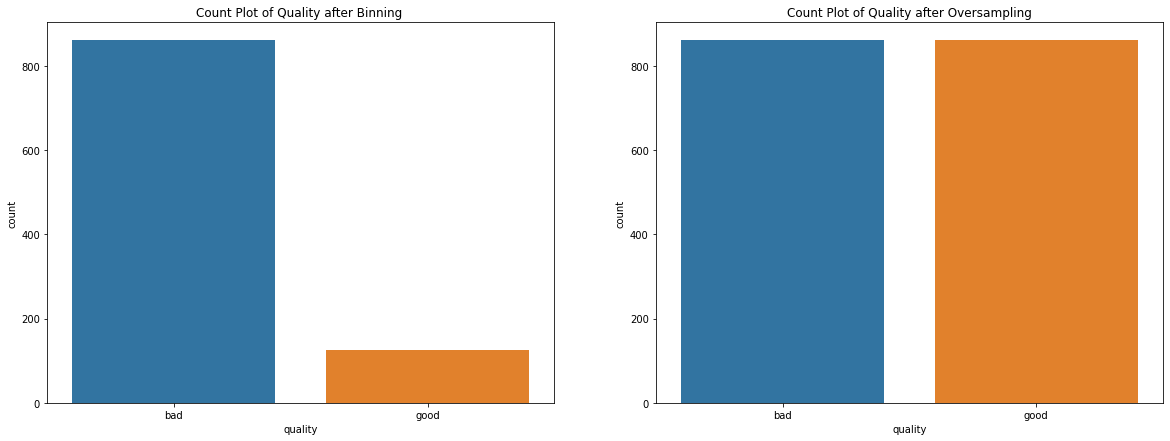

In [20]:
# separating features in X and target variable in y variable and splitting data into train-test set
X = wine_df.drop('quality', axis = 1)
y = wine_df['quality']

# apply SMOTE algorithm
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.title('Count Plot of Quality after Binning ')
sns.countplot(wine_df['quality'])
plt.subplot(1, 2, 2)
sns.countplot(y)
plt.title('Count Plot of Quality after Oversampling')
plt.show()

In [21]:
# apply scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
# first let's train Support Vector Machine Classifier
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_predictions = sv_clf.predict(X_test)
print(f"Accuracy of {sv_clf.__class__.__name__} on test data: {accuracy_score(y_test, sv_predictions)}")

Accuracy of SVC on test data: 0.9255813953488372


In [23]:
# now we train RandomForest Classifier
random_forest_clf = RandomForestClassifier(n_estimators=200)
random_forest_clf.fit(X_train, y_train)
rf_predictions = random_forest_clf.predict(X_test)
print(f"Accuracy of {random_forest_clf.__class__.__name__} on test data: {accuracy_score(y_test, rf_predictions)}")

Accuracy of RandomForestClassifier on test data: 0.9441860465116279


In [24]:
# now we train LogisticRegression Classifier
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
logistic_predictions = logistic_clf.predict(X_test)
print(f"Accuracy of {logistic_clf.__class__.__name__} on test data: {accuracy_score(y_test, logistic_predictions)}")

Accuracy of LogisticRegression on test data: 0.8395348837209302


## Evaluation

Random Forest Classifier is giving good accuracy as compared to SVC and Logistic Regression. Let's further evaluate the Random Forest model. We'll get confusion matrix and a classification report for our evaluation.

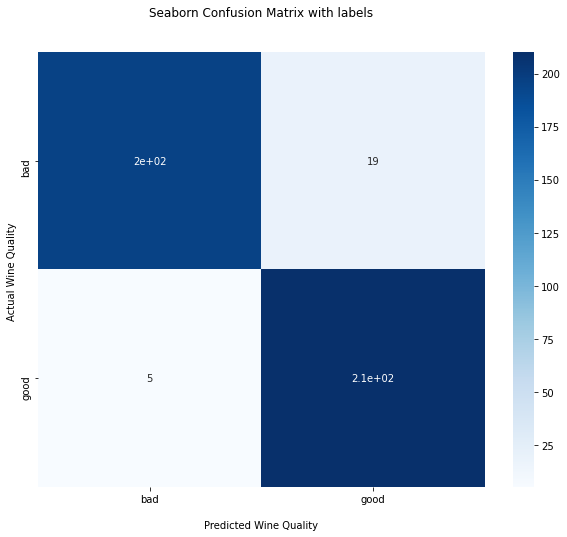

In [25]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Wine Quality')
ax.set_ylabel('Actual Wine Quality ');
ax.xaxis.set_ticklabels(['bad','good'])
ax.yaxis.set_ticklabels(['bad','good'])
plt.show()

In [26]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

         bad       0.98      0.91      0.94       215
        good       0.92      0.98      0.95       215

    accuracy                           0.94       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.94      0.94       430



#### Conclusion:  
1. Alcohol is positively and highly correlated with the quality of the red wine.
2. Residual Sugar has a weak positive correlation with the pH value.
3. Citric acid and density have a strong positive correlation with fixed acidity.
4. pH has a negative correlation with density, fixed acidity, citric acid, and chlorides.
5. From distribution plots we say that 'pH', 'denisity' are normally distibuted and these follow gaussian distribution. And other are right skewed.
7. From the line plot of alcohol and wine quality, we can say that higher the alcohol concentration is, the higher the quality of the wine.
8. Also, **'alcohol', 'fixed acidity', 'total sulfur dioxide', 'free sulfur dioxide'** are highly affecting the quality of red wine.
9. We detected outliers using Inter-Quartile-Range(IQR) method and removed these in data preparation(cleaning) section. 
9. Finaly, we built and evaluated a classification models to predict the quality of red wine in two categories i.e. 'bad' and 'good'. Random Forest model is giving 93% accuracy on test data. If we see the precision/recall, it is high for both the categories. 